In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re

In [48]:
mpl.rcdefaults()
plt.style.use(["../stylesheet.mplstyle"])

In [49]:
marker_dict = {
    "bootstrap": "^",
    "oob constant": "o"
}
def plot_uncertainty_metrics_by_method(
    df,
    axs,
    title=None,
    show_legend=True,
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0), ("NLPD", None)],
    labels = {"oob constant": "empirical oob residuals", "bootstrap": "bootstrap", "jackknife": "jackknife"},
    y_label="mean value",
    x_label="train",
    yerr_label="std error of value"
):
    xmin = min(df[x_label])
    xmax = max(df[x_label])
    for i, (metric, target) in enumerate(metrics):
        ax = axs[i]
        ax.set_ylabel(metric)
        ax.set_xlabel("training rows")
        if target is not None:
            ax.hlines(target, xmin=xmin, xmax=xmax, colors='k', linestyles='--')
        for label, this_df in df.groupby("metric"):
            if metric in label:
                this_label = re.match(f"{metric} \((.+)\)", label).group(1)
                if this_label in labels:
                    x = this_df[x_label]
                    y = this_df[y_label]
                    yerr = this_df[yerr_label]
                    marker = marker_dict.get(this_label, "")
                    ax.errorbar(x, y, yerr=yerr, label=labels[this_label], marker=marker, ms=8)
    if title is not None:
        axs[1].set_title(title)
    if show_legend:
        axs[-1].legend()

In [50]:
def plot_uncertainty_metrics_by_problem(
    labeled_dfs,
    axs,
    method="bootstrap",
    title=None,
    show_legend=True,
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0)],
    y_label="mean value",
    x_label="train",
    yerr_label="std error of value"
):
    xmin = min([min(df[x_label]) for df in labeled_dfs.values()])
    xmax = max([max(df[x_label]) for df in labeled_dfs.values()])
    for i, (metric, target) in enumerate(metrics):
        ax = axs[i]
        ax.set_ylabel(metric)
        ax.set_xlabel("training rows")
        if target is not None:
            ax.hlines(target, xmin=xmin, xmax=xmax, colors='k', linestyles='--')
        for label, df in labeled_dfs.items():
            filtered_df = df[[foo == f"{metric} ({method})" for foo in df["metric"]]]
            x = filtered_df[x_label]
            y = filtered_df[y_label]
            yerr = filtered_df[yerr_label]
            ax.errorbar(x, y, yerr=yerr, label=label)
    if title is not None:
        plt.suptitle(title)
    if show_legend:
        axs[-1].legend()

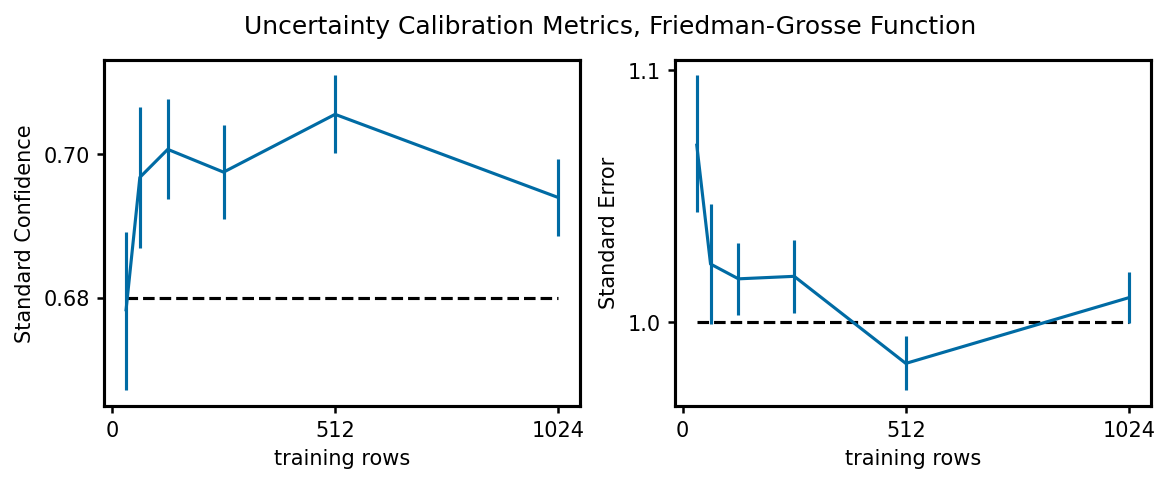

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
plot_uncertainty_metrics_by_problem(
    labeled_dfs = {
        "FG": pd.read_csv("../../uncertainty-study/Friedman-Grosse/noise-2-prediction.csv")
    },
    axs=axs,
    title="Uncertainty Calibration Metrics, Friedman-Grosse Function",
    show_legend=False
)
axs[0].set_xticks([0, 512, 1024])
axs[1].set_xticks([0, 512, 1024])
axs[0].set_yticks([0.68, 0.7])
axs[1].set_yticks([1.0, 1.1])
plt.show()

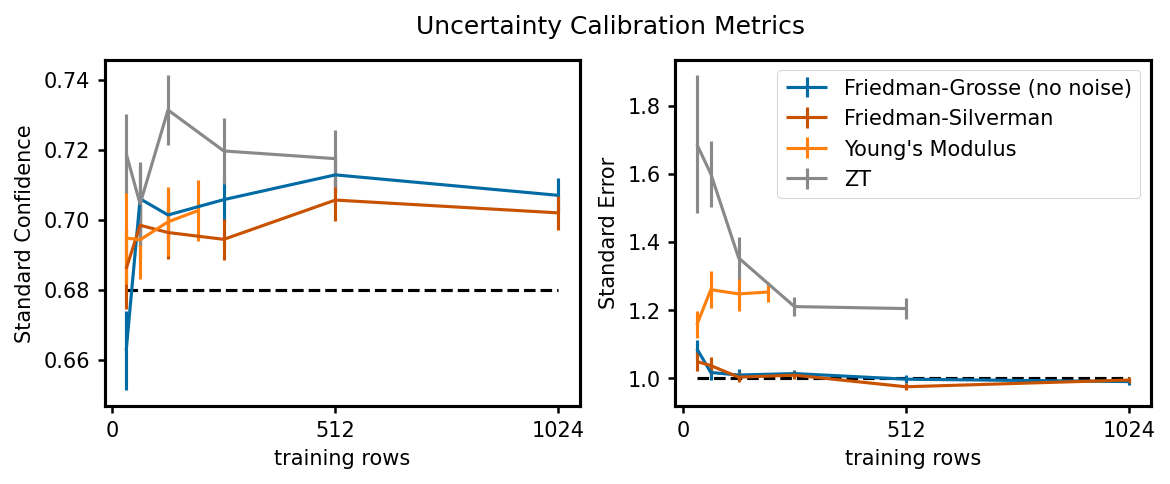

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
plot_uncertainty_metrics_by_problem(
    labeled_dfs = {
        "Friedman-Grosse (no noise)": pd.read_csv("../../uncertainty-study/Friedman-Grosse/noise-0-prediction.csv"),
        "Friedman-Silverman": pd.read_csv("../../uncertainty-study/Friedman-Silverman/noise-2-prediction.csv"),
        "Young's Modulus": pd.read_csv("../../uncertainty-study/mechanical-properties/Youngs-Modulus.csv"),
        "ZT": pd.read_csv("../../uncertainty-study/thermoelectrics/ZT.csv"),
    },
    axs=axs,
    title="Uncertainty Calibration Metrics"
)
axs[0].set_xticks([0, 512, 1024])
axs[1].set_xticks([0, 512, 1024])
plt.show()

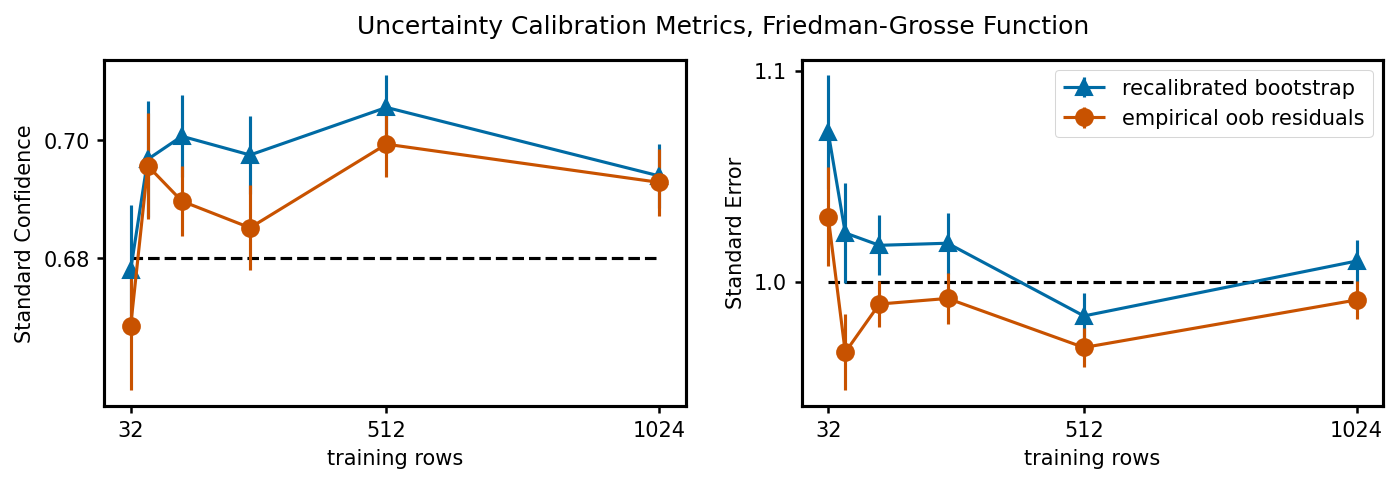

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))
plot_uncertainty_metrics_by_method(
    df = pd.read_csv("../../uncertainty-study/Friedman-Grosse/noise-2-prediction.csv"),
    axs = axs,
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0)],
    labels = {"oob constant": "empirical oob residuals", "bootstrap": "recalibrated bootstrap"}
)
plt.suptitle("Uncertainty Calibration Metrics, Friedman-Grosse Function")
axs[0].set_yticks([0.68, 0.7])
axs[1].set_yticks([1.0, 1.1])
axs[0].set_xticks([32, 512, 1024])
axs[1].set_xticks([32, 512, 1024])
plt.savefig("fig2.svg")

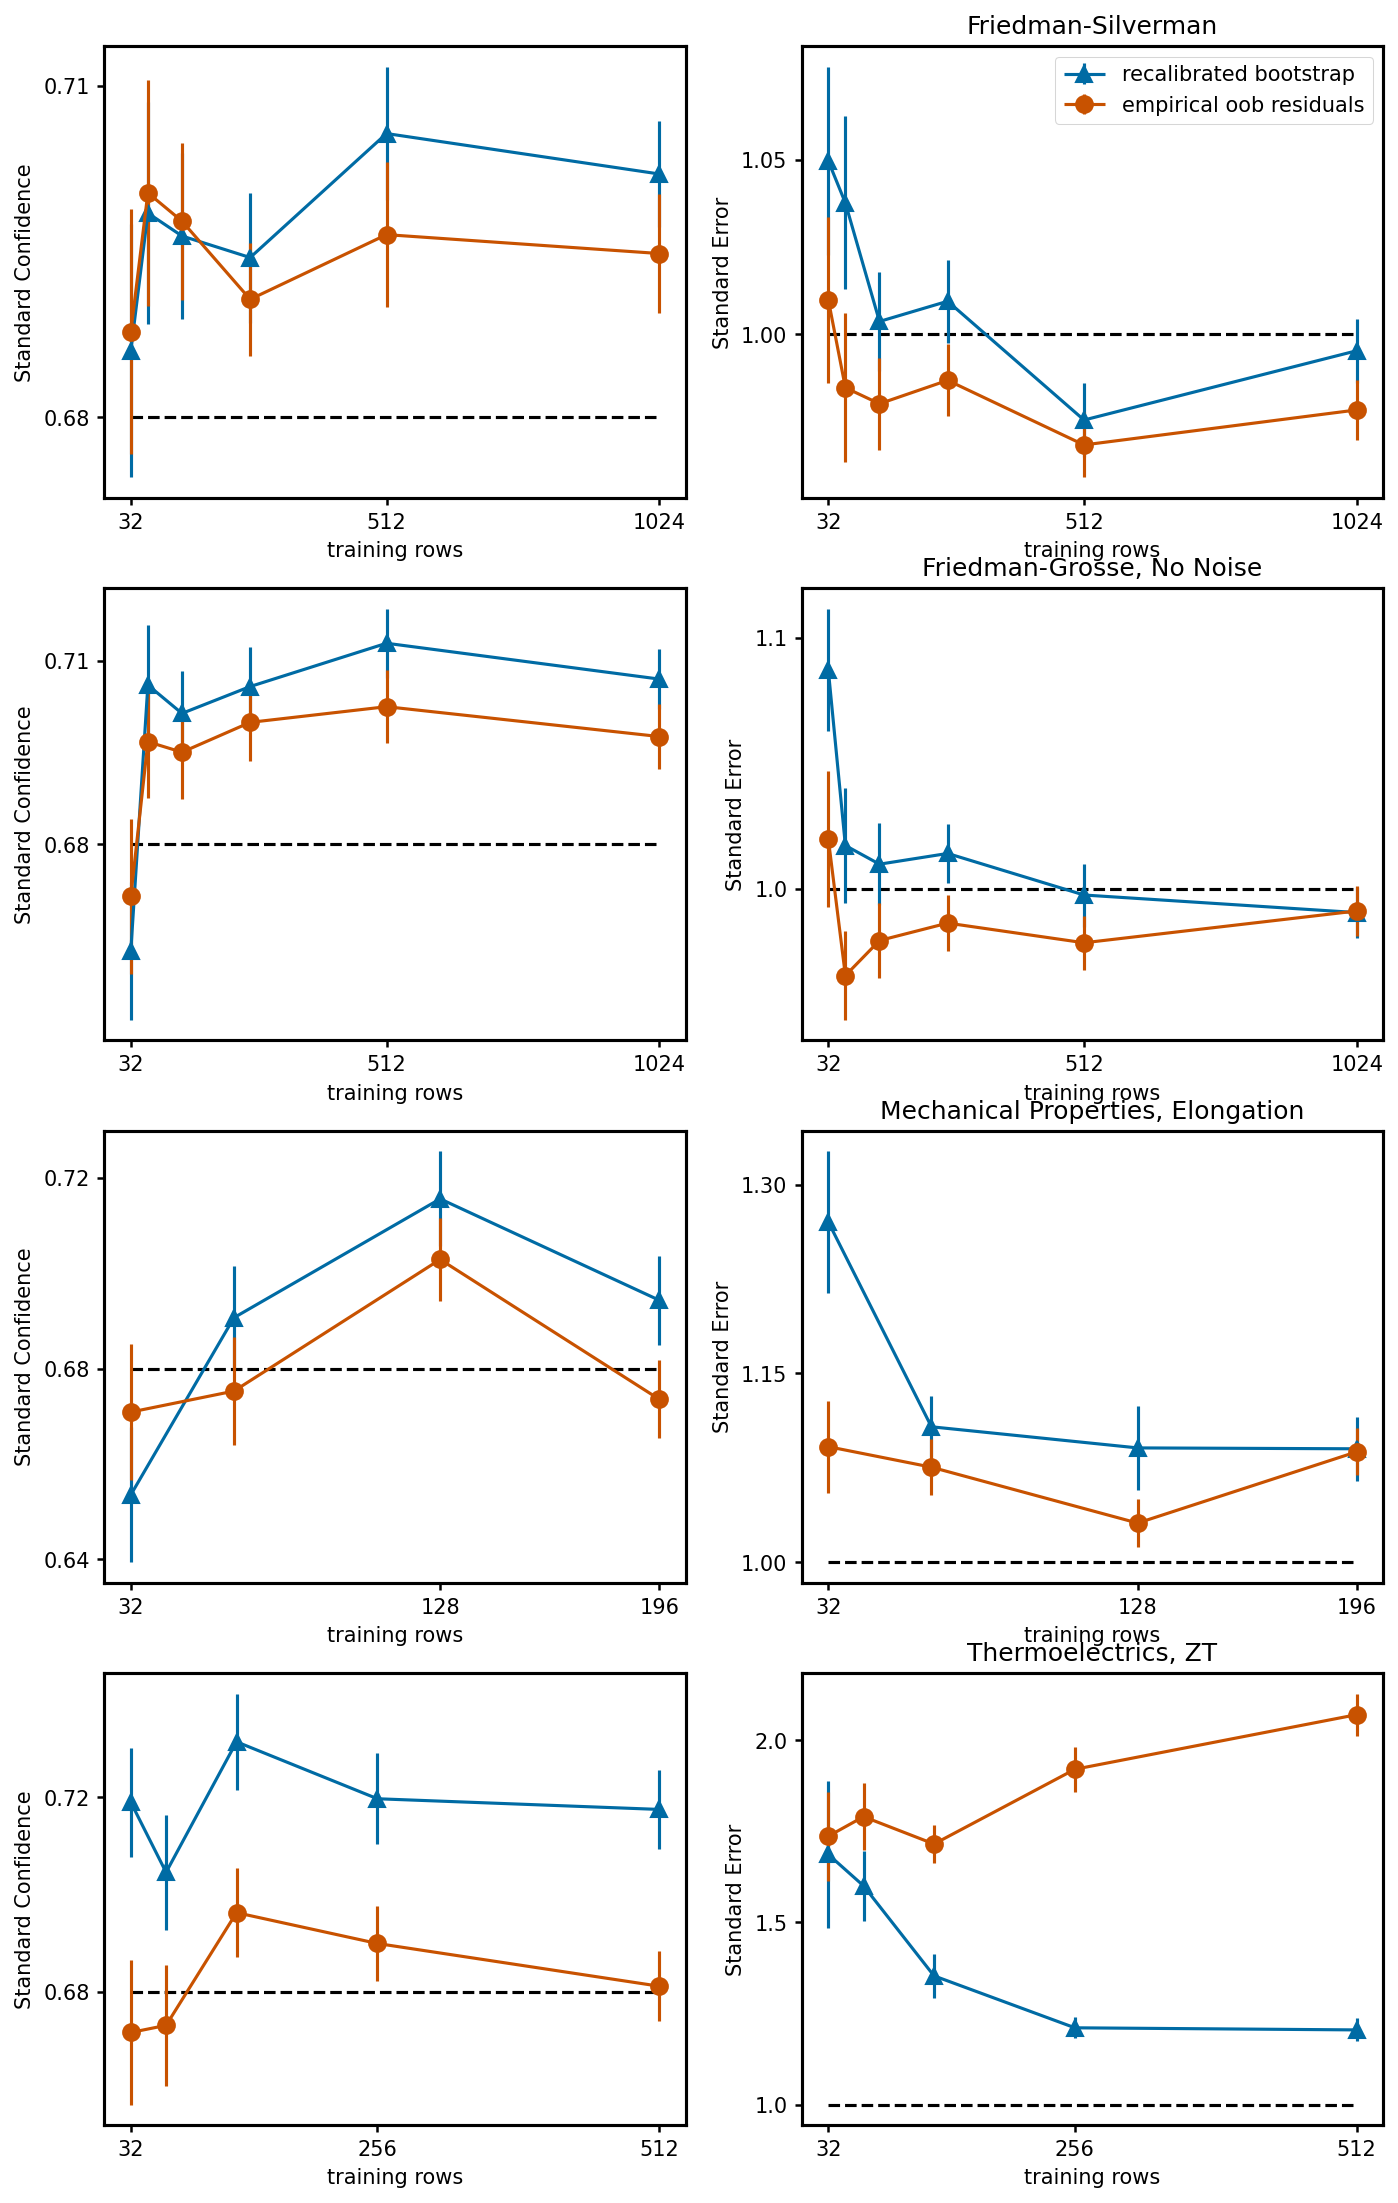

In [52]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(11, 18))
plot_uncertainty_metrics_by_method(
    df = pd.read_csv("../../uncertainty-study/Friedman-Silverman/noise-2-prediction.csv"),
    axs = axs[0, :],
    title="Friedman-Silverman",
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0)],
    labels = {"oob constant": "empirical oob residuals", "bootstrap": "recalibrated bootstrap"}
)
axs[0, 0].set_yticks([0.68, 0.71])
axs[0, 1].set_yticks([1.0, 1.05])
axs[0, 0].set_xticks([32, 512, 1024])
axs[0, 1].set_xticks([32, 512, 1024])

plot_uncertainty_metrics_by_method(
    df = pd.read_csv("../../uncertainty-study/Friedman-Grosse/noise-0-prediction.csv"),
    axs = axs[1, :],
    title="Friedman-Grosse, No Noise",
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0)],
    labels = {"oob constant": "empirical oob residuals", "bootstrap": "recalibrated bootstrap"},
    show_legend=False
)
axs[1, 0].set_yticks([0.68, 0.71])
axs[1, 1].set_yticks([1.0, 1.1])
axs[1, 0].set_xticks([32, 512, 1024])
axs[1, 1].set_xticks([32, 512, 1024])

plot_uncertainty_metrics_by_method(
    df = pd.read_csv("../../uncertainty-study/mechanical-properties/Elongation.csv"),
    axs = axs[2, :],
    title="Mechanical Properties, Elongation",
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0)],
    labels = {"oob constant": "empirical oob residuals", "bootstrap": "recalibrated bootstrap"},
    show_legend=False
)
axs[2, 0].set_yticks([0.64, 0.68, 0.72])
axs[2, 1].set_yticks([1.0, 1.15, 1.30])
axs[2, 0].set_xticks([32, 128, 196])
axs[2, 1].set_xticks([32, 128, 196])

plot_uncertainty_metrics_by_method(
    df = pd.read_csv("../../uncertainty-study/thermoelectrics/ZT.csv"),
    axs = axs[3, :],
    title="Thermoelectrics, ZT",
    metrics=[("Standard Confidence", 0.68), ("Standard Error", 1.0)],
    labels = {"oob constant": "empirical oob residuals", "bootstrap": "recalibrated bootstrap"},
    show_legend=False
)
axs[3, 0].set_yticks([0.68, 0.72])
axs[3, 1].set_yticks([1.0, 1.5, 2.0])
axs[3, 0].set_xticks([32, 256, 512])
axs[3, 1].set_xticks([32, 256, 512])

plt.savefig("supplementary.svg")